In [1]:
from Bio import Phylo
tree = Phylo.read("./opsin_wt_tree/vpod_1.1_wt/wt_aligned_VPOD_1.1_het.fasta.treefile", "newick")

In [ ]:
from ete3 import Tree
import ete3
tree = Tree("./opsin_wt_tree/vpod_1.1_wt/wt_aligned_VPOD_1.1_het.fasta.treefile", format=1)

In [4]:
# Assign unique names to unnamed clades
def assign_unique_names(tree):
    counter = 1
    for clade in tree.find_clades():
        if clade.name is None:
            clade.name = f'Node{counter}'
            counter += 1

assign_unique_names(tree)

In [5]:
clades = list(tree.find_clades(order='level'))

clades

[Clade(name='Node1'),
 Clade(branch_length=0.040201682, name='Bovine'),
 Clade(branch_length=0.0477538258, confidence=97, name='Node2'),
 Clade(branch_length=0.0130588113, confidence=85, name='Node350'),
 Clade(branch_length=0.0109293208, confidence=50, name='Node3'),
 Clade(branch_length=0.0001375959, name='S245'),
 Clade(branch_length=0.0058539809, confidence=87, name='Node351'),
 Clade(branch_length=0.0180398811, confidence=93, name='Node355'),
 Clade(branch_length=0.0183666775, confidence=52, name='Node4'),
 Clade(branch_length=0.0114811752, confidence=92, name='Node340'),
 Clade(branch_length=0.0186175675, confidence=93, name='Node352'),
 Clade(branch_length=0.0092278303, confidence=96, name='Node353'),
 Clade(branch_length=0.0297588075, confidence=100, name='Node356'),
 Clade(branch_length=0.0103421649, name='S349'),
 Clade(branch_length=0.0200437049, confidence=92, name='Node5'),
 Clade(branch_length=0.0215849477, confidence=56, name='Node336'),
 Clade(branch_length=0.075262427,

In [6]:
# Create a mapping from node names to indices
node_to_index = {clade.name: idx for idx, clade in enumerate(clades)}
node_to_index

{'Node1': 0,
 'Bovine': 1,
 'Node2': 2,
 'Node350': 3,
 'Node3': 4,
 'S245': 5,
 'Node351': 6,
 'Node355': 7,
 'Node4': 8,
 'Node340': 9,
 'Node352': 10,
 'Node353': 11,
 'Node356': 12,
 'S349': 13,
 'Node5': 14,
 'Node336': 15,
 'Node341': 16,
 'Node346': 17,
 'S61': 18,
 'S106': 19,
 'Node354': 20,
 'S194': 21,
 'Node357': 22,
 'S302': 23,
 'Node6': 24,
 'Node86': 25,
 'S40': 26,
 'Node337': 27,
 'S68': 28,
 'Node342': 29,
 'Node347': 30,
 'S187': 31,
 'S104': 32,
 'S105': 33,
 'Node358': 34,
 'S348': 35,
 'Node7': 36,
 'S48': 37,
 'Node87': 38,
 'Node89': 39,
 'Node338': 40,
 'S115': 41,
 'Node343': 42,
 'S342': 43,
 'Node348': 44,
 'S117': 45,
 'Node359': 46,
 'S103': 47,
 'Node8': 48,
 'S49': 49,
 'S60': 50,
 'Node88': 51,
 'Node90': 52,
 'Node335': 53,
 'S112': 54,
 'Node339': 55,
 'Node344': 56,
 'Node345': 57,
 'S116': 58,
 'Node349': 59,
 'Node360': 60,
 'S101': 61,
 'Node9': 62,
 'Node81': 63,
 'S178': 64,
 'S180': 65,
 'Node91': 66,
 'Node333': 67,
 'S350': 68,
 'S351': 69,


In [7]:
def get_parent_dict(tree):
    parent_dict = {}
    for clade in tree.find_clades(order='level'):
        for child in clade.clades:
            parent_dict[child] = clade
    return parent_dict

# Create the parent dictionary
parent_dict = get_parent_dict(tree)
parent_dict

{Clade(branch_length=0.040201682, name='Bovine'): Clade(name='Node1'),
 Clade(branch_length=0.0477538258, confidence=97, name='Node2'): Clade(name='Node1'),
 Clade(branch_length=0.0130588113, confidence=85, name='Node350'): Clade(name='Node1'),
 Clade(branch_length=0.0109293208, confidence=50, name='Node3'): Clade(branch_length=0.0477538258, confidence=97, name='Node2'),
 Clade(branch_length=0.0001375959, name='S245'): Clade(branch_length=0.0477538258, confidence=97, name='Node2'),
 Clade(branch_length=0.0058539809, confidence=87, name='Node351'): Clade(branch_length=0.0130588113, confidence=85, name='Node350'),
 Clade(branch_length=0.0180398811, confidence=93, name='Node355'): Clade(branch_length=0.0130588113, confidence=85, name='Node350'),
 Clade(branch_length=0.0183666775, confidence=52, name='Node4'): Clade(branch_length=0.0109293208, confidence=50, name='Node3'),
 Clade(branch_length=0.0114811752, confidence=92, name='Node340'): Clade(branch_length=0.0109293208, confidence=50, na

In [8]:
import os
import shutil 
from deepBreaks.preprocessing import read_data


In [11]:
# defining user params, file pathes, analysis type

#assign your path to folder containing all the datasplits
#path = './vpod_1.1_data_splits_2024-05-02_16-58-09'
# path to sequences of interest
seqFileName = f'wt_aligned_VPOD_1_gap_dropped.fasta' 
tr = read_data(seqFileName, seq_type = 'aa', is_main=True, gap_threshold=1)

sequences = []
with open(seqFileName, 'r') as f:
    x = 0
    seq = ''
    for line in f:
        if '>' in line:
            if x == 0:
                x+=1
            else:
                sequences.append(seq)
                seq = ''
        else:
            seq+=line.strip().replace('\n','')
    sequences.append(seq)

In [12]:
import pandas as pd

# Define your amino acid alphabet including '-'
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
amino_acids.append('nan')
# Create a dictionary to map amino acids to their numerical codes
aa_to_code = {aa: i for i, aa in enumerate(amino_acids)}

# Hot encode the DataFrame
for col in tr.columns:
    # Convert amino acids to numerical codes
    tr[col] = tr[col].map(aa_to_code)
    
    # One-hot encode
    #one_hot = pd.get_dummies(tr[col], prefix=col)
    #tr = tr.drop(col, axis=1)  
    #tr = tr.join(one_hot)
tr.fillna(20.0)

In [16]:
import pymc as pm
import numpy as np
with pm.Model() as model:
    # Define priors for the root of the phylogeny
    root_prior = pm.Normal('root_prior', mu=0, sigma=1)
    
    # Dictionary to hold the nodes in the model
    node_priors = {tree.root.name: root_prior}
    aa_probs = pm.Dirichlet(f"aa_probs", a=np.ones(21)) 

    # Define priors for each node based on its parent
    for clade in tree.find_clades():
        if clade is tree.root:
            pass
        else:
            parent_clade = parent_dict[clade]
            parent_prior = node_priors[parent_clade.name]
            
            # Define the prior for the current node
            node_priors[clade.name] = pm.Normal(clade.name, mu=parent_prior, sigma=1)
    
    # Observed data
        if clade.name in tr:
            #for pos in range(tr.shape[1]):
                #pm.Categorical(name = f'obs_{clade.name}_{tr.columns[pos]}', 
                #                p = aa_probs, observed=tr.loc[clade.name][pos])
            pm.Categorical(name = f'obs_{clade.name}',  
                observed=tr.loc[clade.name])
            
    # Inference
    trace = pm.sample(draws = 2000, tune=1000, cores=8)


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


KeyboardInterrupt: 

In [23]:
import pymc as pm
import ete3
with pm.Model() as model:
    # Define priors for the root of the phylogeny
    root_prior = pm.Normal('root', mu=0, sigma=1)
    
    # Dictionary to hold the nodes in the model
    #node_priors = {clades[0].name: root_prior}
    node_priors = {tree.root.name: root_prior}

    # Define priors for each node based on its parent
    for clade in clades:
        if clade is tree.root:
            pass
        else:
            parent_clade = parent_dict[clade]
            parent_prior = node_priors[parent_clade.name]
            
            # Define the prior for the current node
            node_priors[clade.name] = pm.Normal(clade.name, mu=parent_prior, sigma=1)
        
    # Observed data
    #for clade in clades:
        #if clade.name in tr:
            #for pos in range(tr.shape[1]):
                #pm.Categorical(name = f'obs_{clade.name}_{tr.columns[pos]}', 
                #                p = aa_probs, observed=tr.loc[clade.name][pos])
        #        pm.Categorical(name = f'obs_{clade.name}',  
         #                      observed=tr.loc[clade.name])
    # Inference
    trace2 = pm.sample(draws = 1000, tune=500, cores=8, target_accept=0.95)


c:\Users\safra\anaconda3\envs\deepBreaks\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1030: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


AttributeError: 'Scratchpad' object has no attribute 'ufunc'
Apply node that caused the error: Add(root_jitter, Node2_jitter, Node3_jitter, Node4_jitter, Node5_jitter, Node86_jitter, Node89_jitter, Node90_jitter, Node91_jitter, Node92_jitter, Node93_jitter, Node94_jitter, Node95_jitter, Node96_jitter, Node97_jitter, Node122_jitter, Node123_jitter, Node124_jitter, Node125_jitter, Node126_jitter, Node127_jitter, Node128_jitter, Node129_jitter, Node130_jitter, Node131_jitter, Node132_jitter, Node134_jitter, Node135_jitter, Node136_jitter, Node137_jitter, Node138_jitter, Node139_jitter)
Toposort index: 1436
Inputs types: [TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=())]
Inputs shapes: [(), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ()]
Inputs strides: [(), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ()]
Inputs values: [array(0.87712358), array(0.04512234), array(0.2767082), array(-0.8422431), array(-0.73928787), array(-0.73794746), array(0.33479769), array(0.60874361), array(-0.36545198), array(-0.64621179), array(-0.91520799), array(0.115159), array(0.29096329), array(-0.01434334), array(-0.62251574), array(-0.44300901), array(0.97317872), array(0.30005434), array(0.84251319), array(-0.33996592), array(-0.80177847), array(0.58282157), array(0.08027265), array(0.00617958), array(-0.03374552), array(0.52281789), array(-0.35038642), array(-0.98016791), array(-0.14476924), array(-0.16691221), array(-0.27111873), array(-0.34098217)]
Outputs clients: [['output']]

HINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work, PyTensor optimizations can be disabled with 'optimizer=None'.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

In [20]:
# Rename nodes (optional, but recommended for robustness)
name_counts = {}  # To track duplicate names
for i, node in enumerate(tree.traverse()):
    original_name = node.name
    if original_name.isdigit(): # Rename nodes with only digits
        node.name = f"Node_{original_name}" 
    else:  # Keep names with non-digit characters
        if original_name in name_counts:
            name_counts[original_name] += 1
            node.name = f"{original_name}_{name_counts[original_name]}"
        else:
            name_counts[original_name] = 0

In [30]:
import pymc as pm
import numpy as np
import ete3

# ... (Load your phylogenetic tree data into an ete3.Tree object)

with pm.Model() as model:
    # Root prior (adjust as needed)
    root_prior = pm.Normal('root', mu=0, sigma=1) 
    node_priors = {} # Store the priors of all nodes
    aa_probs = pm.Dirichlet(f"aa_probs", a=np.ones(21)) 

    # Iterate over nodes in postorder and define priors and likelihood
    for node in tree.traverse("postorder"):
        name = node.name
        parent_name = node.up.name if node.up else None

        if parent_name:
            if parent_name not in node_priors:  
                # Ensure parent node's prior is defined
                node_priors[parent_name] = pm.Normal(parent_name, mu=root_prior, sigma=1) 
            if name not in node_priors:  
                node_priors[name] = pm.Normal(name, mu=node_priors[parent_name], sigma=1)
                #aa_probs = pm.Dirichlet(f"aa_probs_{name}", a=np.ones(21)) 
        else:
            node_priors[name] = root_prior
            #aa_probs = pm.Dirichlet(f"aa_probs_{name}", a=np.ones(21)) 

        # Dirichlet prior for amino acid probabilities at each node (Adjust concentration parameter as needed)
            
        
        # Likelihood (assuming your sequences are aligned and encoded as integers)
        if name in tr:
            for pos in range(tr.shape[1]):
                pm.Categorical(f"obs_{name}_{pos}", p=aa_probs, observed=tr.loc[name][pos])

    # Inference
    trace = pm.sample(draws=2000, tune=1000, cores=8, target_accept=0.95)



You can find the C code in this temporary file: C:\Users\safra\AppData\Local\Temp\pytensor_compilation_error_k8v1o6cg


CompileError: Compilation failed (return status=1):
"C:\Users\safra\anaconda3\envs\deepBreaks\Library\mingw-w64\bin\g++.exe" -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -march=bdver4 -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -msse4a -mcx16 -msahf -mmovbe -maes -msha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mrdseed -mprfchw -madx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mclflushopt -mxsavec -mxsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mclwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=512 -mtune=bdver4 -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -DMS_WIN64 -I"c:\Users\safra\anaconda3\envs\deepBreaks\lib\site-packages\numpy\core\include" -I"c:\Users\safra\anaconda3\envs\deepBreaks\include" -I"c:\Users\safra\anaconda3\envs\deepBreaks\lib\site-packages\pytensor\link\c\c_code" -L"c:\Users\safra\anaconda3\envs\deepBreaks\libs" -L"c:\Users\safra\anaconda3\envs\deepBreaks" -o "C:\Users\safra\AppData\Local\PyTensor\compiledir_Windows-10-10.0.19045-SP0-AMD64_Family_23_Model_96_Stepping_1_AuthenticAMD-3.9.17-64\tmp5l9fls0t\m6f8bc7fe716ef31363fbaefa07497cc1e412bb3ab6244162223af9a5674b6307.pyd" "C:\Users\safra\AppData\Local\PyTensor\compiledir_Windows-10-10.0.19045-SP0-AMD64_Family_23_Model_96_Stepping_1_AuthenticAMD-3.9.17-64\tmp5l9fls0t\mod.cpp" "c:\Users\safra\anaconda3\envs\deepBreaks\python39.dll"
C:\Users\safra\AppData\Local\PyTensor\compiledir_Windows-10-10.0.19045-SP0-AMD64_Family_23_Model_96_Stepping_1_AuthenticAMD-3.9.17-64\tmp5l9fls0t\mod.cpp: In member function 'int {anonymous}::__struct_compiled_op_m6f8bc7fe716ef31363fbaefa07497cc1e412bb3ab6244162223af9a5674b6307::run()':
C:\Users\safra\AppData\Local\PyTensor\compiledir_Windows-10-10.0.19045-SP0-AMD64_Family_23_Model_96_Stepping_1_AuthenticAMD-3.9.17-64\tmp5l9fls0t\mod.cpp:138818:9: internal compiler error: Segmentation fault
         }
         ^
libbacktrace could not find executable to open
Please submit a full bug report,
with preprocessed source if appropriate.
See <https://sourceforge.net/projects/msys2> for instructions.

Apply node that caused the error: Composite{...}(Sum{axes=None}.0, max, 21.0, -380.1528459086232, -0.5, S349, Node_93, S302, Node_100, S348, Node_77, S103, Node_74, S101, S102, S72, S194, Node_96, S105, S104, S106, S61, S245, Node_97, S187, S117, S243, S118, S116, S342, S307, S306, S305, S304, S68, Node_50, root, S115, S114, S113, S112, S40, Node_56, Node_52, S351, S350, S259, S170, S82, S246, S247, S260, S248, S249, S250, S251, Node_99, S242, S120, S241, S119, S235, S80, S234, S79, S233, S78, S232, S77, S252, S255, S332, Node_98, S237, Node_87, S333, S236, S340, Node_86, S211, S217, S214, S218, S215, S212, S209, S206, S203, S208, S205, S202, S162, Node_83, S253, Node_40, S254, S331, S238, S216, S213, S210, Node_51, S163, Node_90, S207, S204, S201, S75, S256, Node_47, S258, S257, S124, S244, Node_91, S125, Node_65, S188, Node_66, S123, S121, S76, Node_48, S122, S74, S171, S169, S131, S190, S132, S130, S129, S231, S229, S230, S128, S225, S329, S239, S220, S226, S228, S224, S165, S227, S223, S164, S330, S222, Node_75, S221, S219, S109, S84, S261, S168, S262, S264, S345, S100, S322, Node_58, S323, S320, Node_84, S267, Node_78, S344, Node_94, S172, S98, S291, S97, S96, S197, S303, Node_76, S99, S181, S95, S265, S268, S266, S292, S152, S92, S127, S174, _2, S93, S189, Node_89, S175, S94, S173, S91, S343, S90, S176, S89, S88, S263, S87, S321, S326, S339, Node_92, S324, S328, S240, S335, Node_41, S325, S166, S86, S126, S327, _1, S85, S151, S150, S182, S314, S352, S353, S196, S195, S318, S317, S315, S274, S273, S275, S272, S270, S156, S316, S313, S185, S184, S199, Node_95, S200, S198, S154, S153, S347, S319, S354, S183, S355, S294, S293, S296, S295, S279, S277, S278, S276, S271, S300, S299, S298, S297, S157, S301, S155, S108, S107, S346, S341, S308, S134, S136, S137, S186, S135, S286, Node_44, S282, Node_71, S281, S280, S287, S334, S336, S337, S160, S159, S161, S158, S133, S83, S81, S284, S139, S289, S312, S311, S310, S309, S138, Node_85, S283, S285, S149, Node_53, S143, S142, Node_69, S288, Node_67, S290, S148, Node_80, S141, Node_45, S269, S193, Node_49, S145, S146, S147, S140, S144, S73, S180, S178, S60, S48, S49, S192, Node_60, S69, S52, S59, S51, S50, Node_55, S179, S177, S110, S70, Node_33, S360, S361, S359, S358, S357, S191, Node_61, S338, S167, S111, S71, S62, S54, S356, Node_82, S65, Node_81, S66, S67, S56, S64, S58, S63, S57, S55, S53, S39, S33, Node_64, S32, S30, S21, S20, Node_79, S25, S35, S34, S16, S28, S26, S22, S15, Node_57, S43, S38, S37, S27, S36, S29, S24, S13, Node_72, S31, S23, S46, S47, S44, S42, S41, S19, S18, S17, Node_63, S45, S14, S12, S11, S10, S7, S6, S5, S9, S8, S3, S4, Node_73, S2, S1, Sum{axes=None}.0, -inf, 42.335616460753485, Sum{axes=None}.0, Any{axis=0}.0, Any{axis=0}.0)
Toposort index: 28
Inputs types: [TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(float32, shape=()), TensorType(float64, shape=()), TensorType(float64, shape=()), TensorType(bool, shape=()), TensorType(bool, shape=())]

HINT: Use a linker other than the C linker to print the inputs' shapes and strides.
HINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work, PyTensor optimizations can be disabled with 'optimizer=None'.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

<Figure size 2400x1800 with 0 Axes>

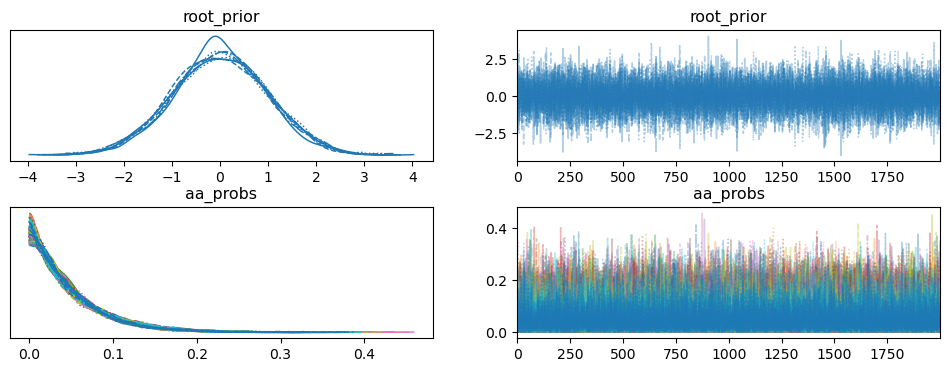

In [253]:
import arviz as az
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=300)
az.plot_trace(trace)
plt.subplots_adjust(hspace=0.35)

plt.show()

In [212]:
trace

Inference data with groups:
	> posterior
	> sample_stats

In [213]:
print(trace.posterior.data_vars)

Data variables:
    root_prior  (chain, draw) float64 128kB -0.6581 0.1451 ... -2.027 -1.74
    aa_probs    (chain, draw, aa_probs_dim_0) float64 256kB 0.2037 ... 0.1292


In [217]:
position_to_analyze = 1600
posterior_aa_probs_at_pos5 = trace.posterior['aa_probs'][:, position_to_analyze]


In [218]:
posterior_aa_probs_at_pos5

<xarray.DataArray 'aa_probs' (chain: 8, aa_probs_dim_0: 2)> Size: 128B
array([[0.75342953, 0.24657047],
       [0.86921336, 0.13078664],
       [0.85455149, 0.14544851],
       [0.4342834 , 0.5657166 ],
       [0.26017936, 0.73982064],
       [0.76743594, 0.23256406],
       [0.83596601, 0.16403399],
       [0.51047901, 0.48952099]])
Coordinates:
  * chain           (chain) int32 32B 0 1 2 3 4 5 6 7
    draw            int32 4B 1600
  * aa_probs_dim_0  (aa_probs_dim_0) int32 8B 0 1

array([<Axes: title={'center': 'aa_probs\n0'}>,
       <Axes: title={'center': 'aa_probs\n1'}>], dtype=object)

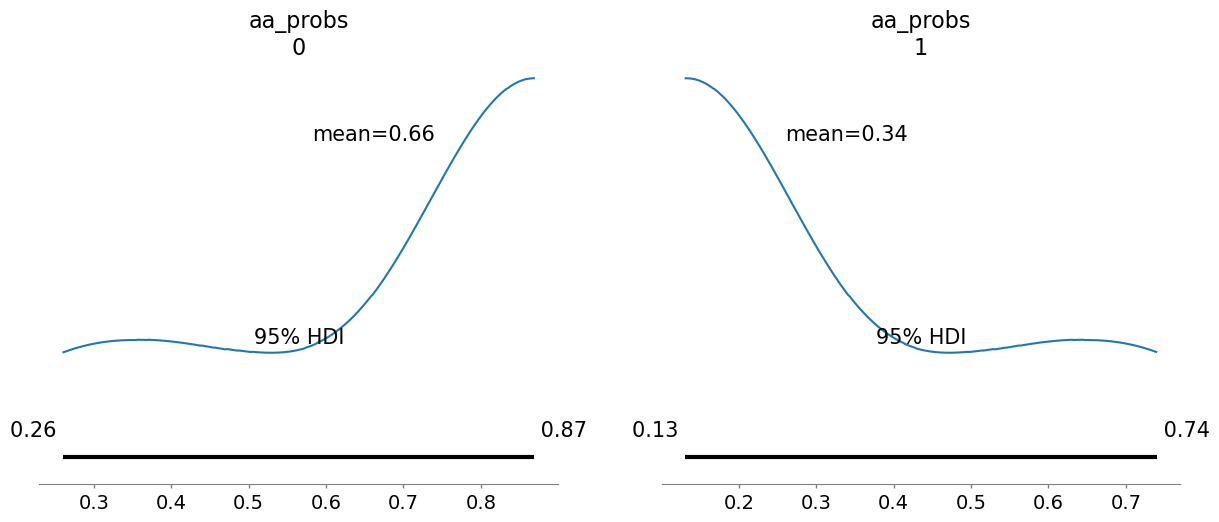

In [219]:
az.plot_posterior(posterior_aa_probs_at_pos5, hdi_prob=0.95)


In [209]:
posterior_aa_probs_at_pos5[1]

<xarray.DataArray 'aa_probs' (aa_probs_dim_0: 2)> Size: 16B
array([0.44232643, 0.55767357])
Coordinates:
    chain           int32 4B 1
    draw            int32 4B 352
  * aa_probs_dim_0  (aa_probs_dim_0) int32 8B 0 1

In [178]:
relevant_samples_for_clade

<xarray.DataArray 'aa_probs' (aa_probs_dim_0: 2)> Size: 16B
array([0.08672269, 0.91327731])
Coordinates:
    chain           int32 4B 0
    draw            int32 4B 352
  * aa_probs_dim_0  (aa_probs_dim_0) int32 8B 0 1

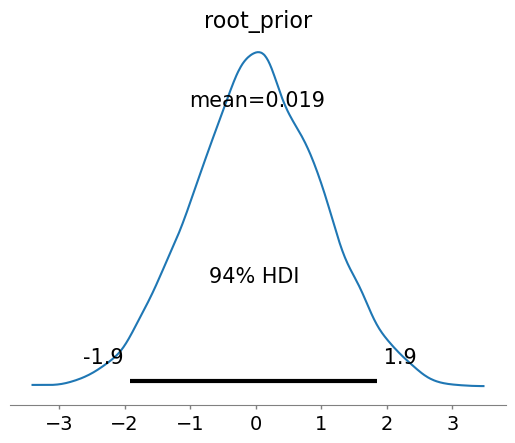

In [81]:
az.plot_posterior(trace)
plt.show()

In [84]:
with model:
    ppc = pm.sample_posterior_predictive(trace)

In [90]:
inference_data  = az.from_pymc(trace = trace, posterior_predictive=ppc, model=model)
az.plot_ppc(ppc)

plt.show()


TypeError: `data` argument must have the group "posterior_predictive" for ppcplot